In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [3]:
plt.rcParams['figure.figsize'] = [17, 8]

In [4]:
wav = '/home/kureta/Music/violin/CD1/01 Sonata no_1 in G minor, BWV 1001 - 1_ Adagio.wav'

In [5]:
y, sr = librosa.load(wav, sr=48000, offset=7, duration=4)

In [6]:
D = librosa.stft(y, n_fft=2048, hop_length=512, window='hann', center=False)

In [7]:
H, P = librosa.decompose.hpss(D, kernel_size=31, margin=1.0)

/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


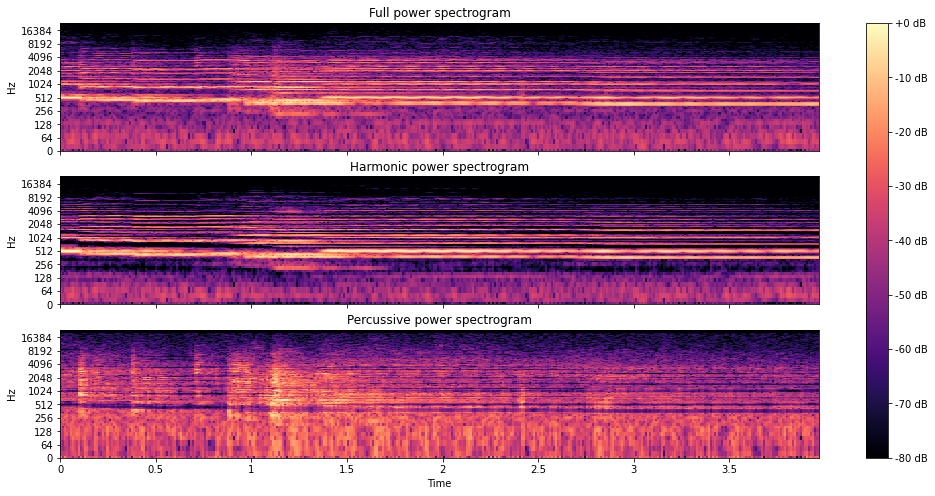

In [8]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0], sr=sr, hop_length=512)
ax[0].set(title='Full power spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1], sr=sr, hop_length=512)
ax[1].set(title='Harmonic power spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[2], sr=sr, hop_length=512)
ax[2].set(title='Percussive power spectrogram')

fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [9]:
y_hat = librosa.istft(H + P, hop_length=512)
y_harm = librosa.istft(H, hop_length=512)
y_perc = librosa.istft(P, hop_length=512)

In [10]:
ipd.Audio(y, rate=sr)

In [11]:
ipd.Audio(y_hat, rate=sr)

In [12]:
ipd.Audio(y_harm, rate=sr)

In [13]:
ipd.Audio(y_perc, rate=sr)